In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)

623

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_data = []

# counters
record_count = 1
set_count = 1

# loop for cities
for i, city in enumerate(cities):

    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "&q=" + city


    record_count += 1

    try:
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [14]:
# convert from json
city_data_pd = pd.DataFrame(city_data)

city_data_pd.count()

city_data_pd

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,62.13,79,100,24.94,ZA,1637705348
1,iquique,-20.2208,-70.1431,64.44,71,98,4.56,CL,1637705348
2,alekseyevsk,57.8406,108.3492,13.86,98,100,2.08,RU,1637705348
3,kamaishi,39.2667,141.8833,41.49,93,79,6.20,JP,1637705348
4,dikson,73.5069,80.5464,1.13,94,100,12.73,RU,1637705349
...,...,...,...,...,...,...,...,...,...
565,coueron,47.2151,-1.7217,42.48,73,0,14.97,FR,1637705488
566,banjar,-8.1900,114.9675,78.66,89,99,4.25,ID,1637705489
567,lima,-12.0432,-77.0282,71.91,68,0,12.66,PE,1637705481
568,xichang,27.8964,102.2634,43.18,96,100,2.77,CN,1637705345


In [16]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

dirty_city_data

Int64Index([], dtype='int64')

In [18]:
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saldanha,-33.0117,17.9442,62.13,79,100,24.94,ZA,1637705348
1,iquique,-20.2208,-70.1431,64.44,71,98,4.56,CL,1637705348
2,alekseyevsk,57.8406,108.3492,13.86,98,100,2.08,RU,1637705348
3,kamaishi,39.2667,141.8833,41.49,93,79,6.20,JP,1637705348
4,dikson,73.5069,80.5464,1.13,94,100,12.73,RU,1637705349


In [28]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv("cities.csv", index_label="City_ID")

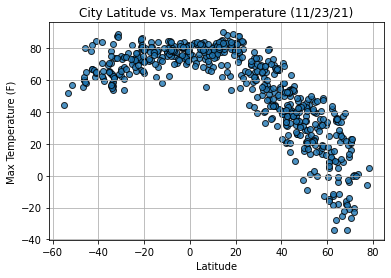

In [38]:
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

This plot shows each city's temperature in coorelation to latitude.

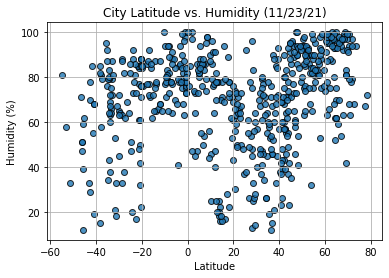

In [31]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

This plot shows each city's humidity in coorelation to latitude. It appears humidity is pretty wide spread without pattern.

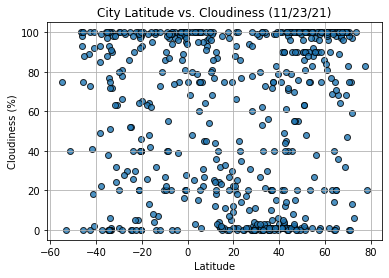

In [32]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.show()

This plot shows each city's cloudiness in coorelation to latitude. It appears cloudiness percentage is pretty wide spread without pattern.

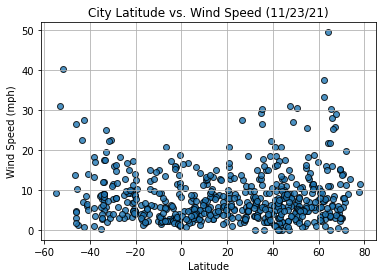

In [33]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

This plot shows each city's wind speed percentage in coorelation to latitude. It appears wind speed percentage is pretty wide spread without pattern. The majority of wind speed percentage is under 20%.